일상 속 풀고자 하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많다. 예를 들어 시험을 봤는데 이 점수가 합격인지 불합격인지, 어떤 메일을 받았을 때 이것이 정상적인 메일인지 스팸 메일인지 분류하는 문제도 그렇다. 이렇게 둘 중 하나를 결정하는 문제를 **이진 분류(Binary Classification)** 라고 한다. 그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다.
- **로지스틱 회귀는 알고리즘의 이름은 회귀지만 실저레로는 분류(classfication) 작업에 사용할 수 있다.**
<br><br>
## 1. 이진 분류(Binary Classification)
---
학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정한다. 시험 성적이 x면, 합격/불합격 결과는 y다. 이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자한다.
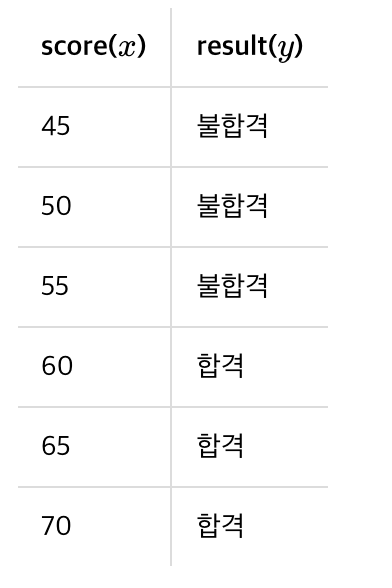
위의 데이터에서 합격을 1, 불합격을 0이라고 했을때 그래프를 그려보면 아래와 같다.
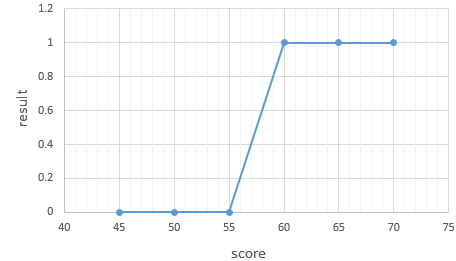
이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현된다. 이러한 x와 y의 관계를 표현하기 위해서는 Wx + b와 같은 직선 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요하다. 이런 문제에 직선을 사용할 경우 분류 작업이 잘 동작하지 않는다.<br><br>
그래서 이번 로지스틱 회귀의 가설은 선형 회귀 때의 H(x) = Wx + b가 아니라, 위와 같이 S자 모양의 그래프를 만들 수 있는 어떤 특정 함수 f를 추가적으로 사용하여 H(x) = f(Wx + b)의 가설을 사용한다. 그리고 위와 같이 S자 모양의 그래프를 그릴 수 있는 어떤 함수 f는 널리 알려져 있는 sigmoid 함수다.<br><br>
## 2. 시그모이드 함수(Sigmoid function)
---
위와 같이 S자 형태로 그래프를 그려주는 시그모이드 함수의 방정식은 아래와 같다.
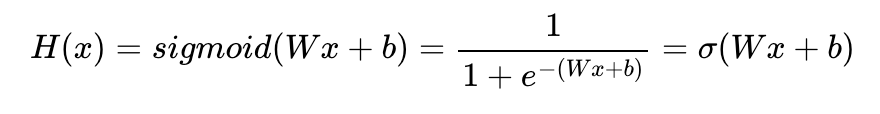
선형 회귀에서는 최적의 W와 b를 찾는 것이 목표였다. 여기서도 마찬가지다. 선형 회귀에서는 W가 직선의 기울기, b가 y절편을 의미했다. 그렇다면 여기서는 W와 b가 함수의 그래프에 어떤 영향을 주는지 직접 그래프를 그려서 알아본다.
- 그래프를 그릴 수 있는 도구인 Matplotlib를 import 한다

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### 1. W가 1이고 b가 0인 그래프
가정 먼저 W가 1이고, b가 0인 그래프를 그려본다.

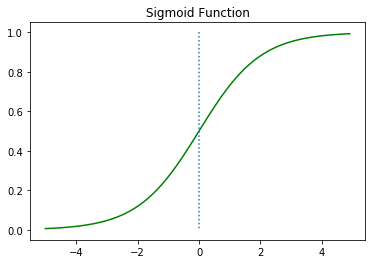

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

위의 그래프를 통해 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환할 수 있다. x가 0일 때 0.5의 값을 가진다. x가 매우 커지면 1에 수렴한다. 반면, x가 매우 작아지면 0에 수렴한다.

### 2. W값의 변화에 따른 경사도의 변화
이제 W의 값을 변화시키고 이에 따른 그래프를 확인해본다.

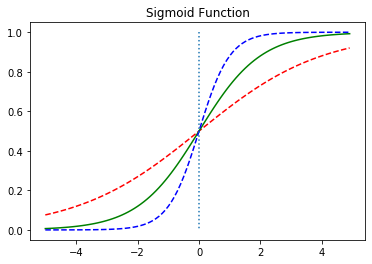

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

### 3. b값의 변화에 따른 좌, 우 이동
이제 b의 값에 따라서 그래프가 어떻게 변하는지 확인한다.

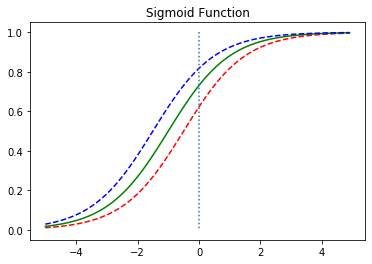

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

### 4. 시그모이드 함수를 이용한 분류
---
시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴한다. **시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데** 이 특성을 이용하여 분류 작업에 사용할 수 있다. 임계값이 0.5일 경우 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)으로 판단할 수 있다. 이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 해당 레이블에 속할 확률이 50%보다 낮으면 아니라고 판단하는 것으로 볼 수 있다.

## 3. 비용 함수(Cost function)
---
이제 로지스틱 회귀의 가설이 H(x) = sigmoid(Wx + b)인 것은 알았다. 이제 최적의 W와 b를 찾을 수 있는 비용 함수(cost function)를 정의해야한다. 그런데 앞서 선형 회귀에서 배운 비용 함수인 평균 제곱 오차(Mean Square Error, MSE)를 로지스틱 회귀의 비용 함수로 사용해본다.<br><br>
다음은 평균 제곱 오차의 수식이다.
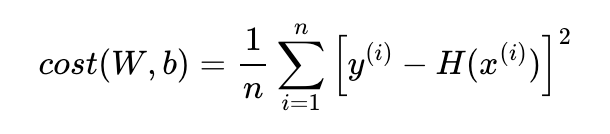
위의 비용 함수 수식에서 가설은 이제 H(x) = Wx + b가 아니라 H(x) = sigmoid(Wx + b)이다. 그리고 이 비용 함수를 미분하면 선형 회귀때아 달리 그림과 유사한 비볼록(non-convex)형태의 그래프가 나온다.
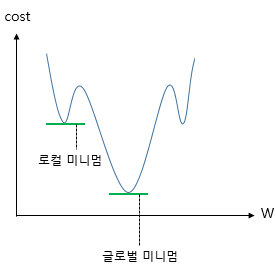
위와 같은 그래프에 경사 하강법을 사용할 경우의 문제점은 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수 있다는 점이다. 사람이 등산 후에 산을 내려올 때도, 가파른 경사를 내려오다가 넓은 평지가 나오면 순간적으로 다 내려왔다고 착각할 수 있다. 하지만 실제로는 그곳이 다 내려온 것이 아니라 잠깐 평지가 나왔을 뿐이라면 길을 더 찾아서 내려가야한다. 모델도 마찬가지로 실제 오차가 최소가 되는 구간을 찾을 수 있도록 도와주어야한다. 만약, 실제 최소가 되는 구간을 잘못 판단하면 최적의 가중치 W가 아닌 다른 값을 택해 모델의 성능이 더 오르지 않는다. <br><br>이를 전체 함수에 걸쳐 최소값인 글로벌 미니엄(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니엄(Local Minimum)에 도달했다고 한다. 이는 cost가 최소가 되는 가중치 W를 찾는다는 비용 함수의 목적에 맞지 않는다.<br><br>
시그모이드 함수의 특징은 함수의 출력값이 0과 1사이의 값이라는 점이다. 즉 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야 하며, 실제값이 0일 때, 예측값이 1에 가까워지면 오차가 커져야한다. 그리고 이를 충족하는 함수가 바로 로그 함수다. 다음은 y = 0.5에 대칭하는 두 개의 로그 함수 그래프다.
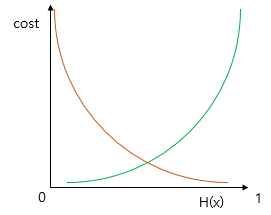
실제값이 1일 때의 그래프를 주황색 선으로 표현하였으며, 실제값이 0일 때의 그래프를 초록색 선으로 표현했다. 실제값이 1이라고 해보자. 이 경우, 예측값인 H(x)의 값이 1이면 오차가 0이므로 당연히 cost는 0이 된다. 반면, H(x)가 0으로 수렴하면 cost는 무한대로 발산한다. 실제값이 0인 경우는 그 반대로 이해하면 된다. 이 두 개의 로그 함수를 식으로 표현하면 다음과 같다.
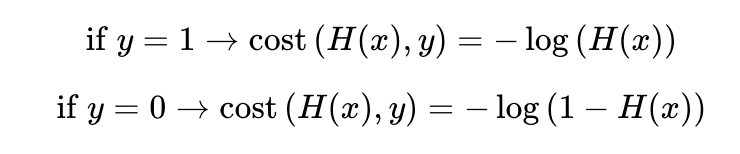
y의 실제값이 1일 때 -log H(x) 그래프를 사용하고 y의 실제값이 0일 때, -log(1-H(x)) 그래프를 사용해야한다.<br>
이는 다음과 같이 하나의 식으로 통합할 수 있다.
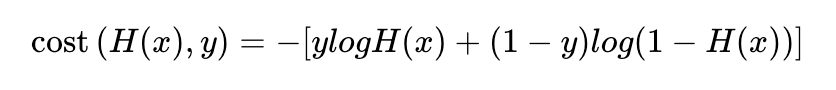
실제값 y가 1이라고 하면 덧셈 기호를 기준으로 우측의 항이 없어진다. 반대로 실제값 y가 0이라고 하면 덧셈 기호를 기준으로 좌측의 항이 없어진다. 선형 회귀에서는 모든 오차의 평균을 구해 평균 제곱 오차를 사용했다. 마찬가지로 여기에서도 모든 오차의 평균을 구한다.
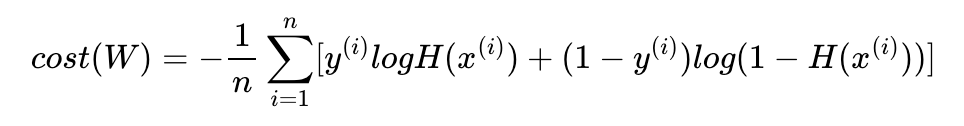
정리하면, 위 비용 함수는 실제값 y와 예측값 H(x)의 차이가 커지면 cost가 커지고, 실제값 y와 예측값 H(x)의 차이가 작아지면 cost는 작아진다. 이제 위 비용 함수에 대해서 경사 하강법을 수행하면서 최적의 가중치 W를 찾아간다.
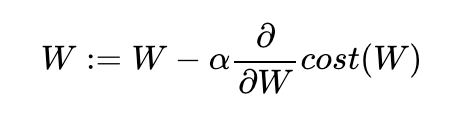

## 4. 파이토치로 로지스틱 회귀 구현하기
---
이제 파이토치로 로지스틱 회귀 중에서도 다수의 x로 부터 y를 예측하는 다중 로지스틱 회귀를 구현해본다.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [15]:
torch.manual_seed(1)

In [16]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [17]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


현재 x_train은 6 x 2의 크기(shape)를 가지는 행렬이며, y_train은 6 x 1의 크기를 가지는 벡터다. x_train을 X라고 하고, 이와 곱해지는 가중치 벡터를 W라고 했을 때, XW가 성립되기 위해서는 W 벡터의 크기는 2 x 1이어야 한다.

In [18]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

이제 가설식을 세워본다. 파이토치에서는 e^x를 구현하기 위해 torch.exp(x)를 사용한다.

In [19]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [20]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


실제값 y_train과 크기가 동일한 6 x 1의 크기를 가지는 벡터가 나오는데 모든 값이 0.5다.<br><br>
파이토치에서는 시그모이드 함수를 이미 구현하여 제공하고 있기 때문에 위 식보다 더 간단하게 구현할 수 있다.

In [21]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [22]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [23]:
print(y_train)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


현재 총 6개의 원소가 존재하지만 하나의 샘플. 즉, 하나의 원소에 대해서만 오차를 구하는 식으로 작성해본다.

In [24]:
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

이제 모든 원소에 대해서 오차를 구해본다.

In [25]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


그 후 전체 오차에 대한 평균을 구한다.

In [26]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


지금까지 비용 함수의 값을 직접 구현했는데, 파이토치에서는 로지스틱 회귀의 비용 함수를 이미 구현해서 제공하고있다.

In [27]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

모델의 훈련 과정까지 추가한 전체 코드는 아래와 같다.

In [31]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [32]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
#     cost = -(y_train * torch.log(hypothesis) + 
#              (1 - y_train) * torch.log(1 - hypothesis)).mean()
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


학습이 끝났다. 이제 훈련했던 데이터를 그대로 입력으로 사용했을 때, 제대로 예측하는지 확인해본다.

In [34]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


현재 위 값들은 0과 1사이의 값을 가지고있다. 이제 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력해본다.

In [39]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [40]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
